# SIGNS Dataset - Tensorflow

## 1. Exploring the Tensorflow Library

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

# TensorFlow and tf.keras
from tensorflow import keras
from tensorflow.keras import layers

from tf_utils import load_dataset, convert_to_one_hot

## 2. Problem statement: SIGNS Dataset

One afternoon, with some friends we decided to teach our computers to decipher sign language. We spent a few hours taking pictures in front of a white wall and came up with the following dataset. It's now your job to build an algorithm that would facilitate communications from a speech-impaired person to someone who doesn't understand sign language.

- **Training set**: 1080 pictures (64 by 64 pixels) of signs representing numbers from 0 to 5 (180 pictures per number).
- **Test set**: 120 pictures (64 by 64 pixels) of signs representing numbers from 0 to 5 (20 pictures per number).

Note that this is a subset of the SIGNS dataset. The complete dataset contains many more signs.

Here are examples for each number, and how an explanation of how we represent the labels. These are the original pictures, before we lowered the image resolutoion to 64 by 64 pixels.
<img src="images/hands.png" style="width:800px;height:350px;"><caption><center> <u><font color='purple'> **Figure 1**</u><font color='purple'>: SIGNS dataset <br> <font color='black'> </center>


Run the following code to load the dataset.

In [2]:
# Loading the dataset
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

y = 5


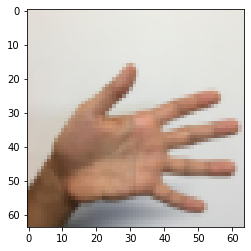

In [3]:
# Example of a picture
index = 0
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

As usual you flatten the image dataset, then normalize it by dividing by 255. On top of that, you will convert each label to a one-hot vector as shown in Figure 1. Run the cell below to do so.

In [4]:
# Flatten the training and test images
X_train_flatten = X_train_orig.reshape(X_train_orig.shape[0], -1).T
X_test_flatten = X_test_orig.reshape(X_test_orig.shape[0], -1).T
# Normalize image vectors
X_train = X_train_flatten/255.
X_test = X_test_flatten/255.
# Convert training and test labels to one hot matrices
Y_train = convert_to_one_hot(Y_train_orig, 6)
Y_test = convert_to_one_hot(Y_test_orig, 6)

n_x = X_train.shape[0]
n_y = 6

print ("Number of training examples = " + str(X_train.shape[1]))
print ("Number of test examples = " + str(X_test.shape[1]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

Number of training examples = 1080
Number of test examples = 120
X_train shape: (12288, 1080)
Y_train shape: (6, 1080)
X_test shape: (12288, 120)
Y_test shape: (6, 120)


**Note** that 12288 comes from $64 \times 64 \times 3$. Each image is square, 64 by 64 pixels, and 3 is for the RGB colors.

**Goal** is to build an algorithm capable of recognizing a sign with high accuracy. To do so, you are going to build a tensorflow model that is almost the same as one you have previously built in numpy for cat recognition (but now using a softmax output).

**The model** is *LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX*. The SIGMOID output layer has been converted to a SOFTMAX. A SOFTMAX layer generalizes SIGMOID to when there are more than two classes. 

### 2.1. Build model

In [5]:
#Layers
input_layer = keras.Input(shape=(n_x,), name='digits')
h_layer_1 = layers.Dense(25, kernel_regularizer=keras.regularizers.l2(0.01), activation='relu', name='dense_1')(input_layer)
h_layer_2 = layers.Dense(12, kernel_regularizer=keras.regularizers.l2(0.01), activation='relu', name='dense_2')(h_layer_1)
output_layer = layers.Dense(n_y, activation='softmax', name='predictions')(h_layer_2)

In [6]:
#Model of NN
model = keras.Model(inputs=input_layer, outputs=output_layer)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
digits (InputLayer)          [(None, 12288)]           0         
_________________________________________________________________
dense_1 (Dense)              (None, 25)                307225    
_________________________________________________________________
dense_2 (Dense)              (None, 12)                312       
_________________________________________________________________
predictions (Dense)          (None, 6)                 78        
Total params: 307,615
Trainable params: 307,615
Non-trainable params: 0
_________________________________________________________________


In [7]:
#Gradient descent optimizer
rms = keras.optimizers.RMSprop(lr=0.01, rho=0.9, epsilon= 0.0001 , decay=0.0)
adam = keras.optimizers.Adam(learning_rate=0.0001, 
                             beta_1=0.9,
                             beta_2=0.999,
                             epsilon=1e-07,
                             amsgrad=False,
                             )
#Loss function
loss_softmax = keras.losses.CategoricalCrossentropy()

model.compile(optimizer= adam,  # Optimizer
              # Loss function to minimize
              loss= loss_softmax,
              # List of metrics to monitor
              metrics=[keras.metrics.CategoricalCrossentropy()])

### 2.2. Train

In [8]:
print('# Fit model on training data')
history = model.fit(X_train.T, Y_train.T, #(m,)
                    batch_size=64,
                    epochs=2000,
                    validation_data= (X_test.T, Y_test.T)
                   )

W0809 09:35:21.472387 140655834781504 deprecation.py:323] From /home/tanh/anaconda3/envs/Tensorflow/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


# Fit model on training data
Train on 1080 samples, validate on 120 samples
Epoch 1/2000
1080/1080 [==============================] - 1s 537us/sample - loss: 2.4439 - categorical_crossentropy: 1.8102 - val_loss: 2.3978 - val_categorical_crossentropy: 1.7825
Epoch 2/2000
1080/1080 [==============================] - 0s 167us/sample - loss: 2.3901 - categorical_crossentropy: 1.7902 - val_loss: 2.3719 - val_categorical_crossentropy: 1.7887
Epoch 3/2000
1080/1080 [==============================] - 0s 156us/sample - loss: 2.3541 - categorical_crossentropy: 1.7843 - val_loss: 2.3283 - val_categorical_crossentropy: 1.7731
Epoch 4/2000
1080/1080 [==============================] - 0s 149us/sample - loss: 2.3184 - categorical_crossentropy: 1.7747 - val_loss: 2.3093 - val_categorical_crossentropy: 1.7782
Epoch 5/2000
1080/1080 [==============================] - 0s 162us/sample - loss: 2.2979 - categorical_crossentropy: 1.7768 - val_loss: 2.2920 - val_categorical_crossentropy: 1.7814
Epoch 6/2000
1

1080/1080 [==============================] - 0s 206us/sample - loss: 1.8484 - categorical_crossentropy: 1.6302 - val_loss: 1.8629 - val_categorical_crossentropy: 1.6467
Epoch 46/2000
1080/1080 [==============================] - 0s 160us/sample - loss: 1.8421 - categorical_crossentropy: 1.6276 - val_loss: 1.8522 - val_categorical_crossentropy: 1.6396
Epoch 47/2000
1080/1080 [==============================] - 0s 145us/sample - loss: 1.8334 - categorical_crossentropy: 1.6224 - val_loss: 1.8524 - val_categorical_crossentropy: 1.6433
Epoch 48/2000
1080/1080 [==============================] - 0s 157us/sample - loss: 1.8270 - categorical_crossentropy: 1.6194 - val_loss: 1.8580 - val_categorical_crossentropy: 1.6521
Epoch 49/2000
1080/1080 [==============================] - 0s 151us/sample - loss: 1.8271 - categorical_crossentropy: 1.6228 - val_loss: 1.8502 - val_categorical_crossentropy: 1.6475
Epoch 50/2000
1080/1080 [==============================] - 0s 169us/sample - loss: 1.8185 - categor

Epoch 90/2000
1080/1080 [==============================] - 0s 191us/sample - loss: 1.6014 - categorical_crossentropy: 1.4673 - val_loss: 1.6252 - val_categorical_crossentropy: 1.4916
Epoch 91/2000
1080/1080 [==============================] - 0s 131us/sample - loss: 1.5745 - categorical_crossentropy: 1.4412 - val_loss: 1.6116 - val_categorical_crossentropy: 1.4787
Epoch 92/2000
1080/1080 [==============================] - 0s 150us/sample - loss: 1.5685 - categorical_crossentropy: 1.4360 - val_loss: 1.6050 - val_categorical_crossentropy: 1.4728
Epoch 93/2000
1080/1080 [==============================] - 0s 153us/sample - loss: 1.5675 - categorical_crossentropy: 1.4357 - val_loss: 1.5954 - val_categorical_crossentropy: 1.4639
Epoch 94/2000
1080/1080 [==============================] - 0s 146us/sample - loss: 1.5719 - categorical_crossentropy: 1.4408 - val_loss: 1.5980 - val_categorical_crossentropy: 1.4673
Epoch 95/2000
1080/1080 [==============================] - 0s 150us/sample - loss: 1.

1080/1080 [==============================] - 0s 170us/sample - loss: 1.3975 - categorical_crossentropy: 1.2817 - val_loss: 1.4291 - val_categorical_crossentropy: 1.3134
Epoch 135/2000
1080/1080 [==============================] - 0s 240us/sample - loss: 1.3999 - categorical_crossentropy: 1.2842 - val_loss: 1.4351 - val_categorical_crossentropy: 1.3195
Epoch 136/2000
1080/1080 [==============================] - 0s 156us/sample - loss: 1.4121 - categorical_crossentropy: 1.2966 - val_loss: 1.4418 - val_categorical_crossentropy: 1.3263
Epoch 137/2000
1080/1080 [==============================] - 0s 173us/sample - loss: 1.4012 - categorical_crossentropy: 1.2859 - val_loss: 1.4196 - val_categorical_crossentropy: 1.3043
Epoch 138/2000
1080/1080 [==============================] - 0s 212us/sample - loss: 1.3828 - categorical_crossentropy: 1.2676 - val_loss: 1.4142 - val_categorical_crossentropy: 1.2990
Epoch 139/2000
1080/1080 [==============================] - 0s 157us/sample - loss: 1.3820 - ca

1080/1080 [==============================] - 0s 230us/sample - loss: 1.2917 - categorical_crossentropy: 1.1789 - val_loss: 1.3059 - val_categorical_crossentropy: 1.1931
Epoch 179/2000
1080/1080 [==============================] - 0s 181us/sample - loss: 1.2834 - categorical_crossentropy: 1.1706 - val_loss: 1.3175 - val_categorical_crossentropy: 1.2046
Epoch 180/2000
1080/1080 [==============================] - 0s 181us/sample - loss: 1.2765 - categorical_crossentropy: 1.1637 - val_loss: 1.2956 - val_categorical_crossentropy: 1.1827
Epoch 181/2000
1080/1080 [==============================] - 0s 250us/sample - loss: 1.2757 - categorical_crossentropy: 1.1629 - val_loss: 1.3087 - val_categorical_crossentropy: 1.1958
Epoch 182/2000
1080/1080 [==============================] - 0s 187us/sample - loss: 1.2674 - categorical_crossentropy: 1.1545 - val_loss: 1.3115 - val_categorical_crossentropy: 1.1986
Epoch 183/2000
1080/1080 [==============================] - 0s 189us/sample - loss: 1.2637 - ca

1080/1080 [==============================] - 0s 207us/sample - loss: 1.1957 - categorical_crossentropy: 1.0804 - val_loss: 1.2452 - val_categorical_crossentropy: 1.1299
Epoch 223/2000
1080/1080 [==============================] - 0s 229us/sample - loss: 1.1881 - categorical_crossentropy: 1.0728 - val_loss: 1.2522 - val_categorical_crossentropy: 1.1368
Epoch 224/2000
1080/1080 [==============================] - 0s 205us/sample - loss: 1.1960 - categorical_crossentropy: 1.0806 - val_loss: 1.2302 - val_categorical_crossentropy: 1.1147
Epoch 225/2000
1080/1080 [==============================] - 0s 210us/sample - loss: 1.1935 - categorical_crossentropy: 1.0779 - val_loss: 1.2281 - val_categorical_crossentropy: 1.1125
Epoch 226/2000
1080/1080 [==============================] - 0s 208us/sample - loss: 1.1731 - categorical_crossentropy: 1.0575 - val_loss: 1.2270 - val_categorical_crossentropy: 1.1113
Epoch 227/2000
1080/1080 [==============================] - 0s 187us/sample - loss: 1.1864 - ca

1080/1080 [==============================] - 0s 155us/sample - loss: 1.1096 - categorical_crossentropy: 0.9890 - val_loss: 1.1649 - val_categorical_crossentropy: 1.0442
Epoch 267/2000
1080/1080 [==============================] - 0s 147us/sample - loss: 1.1113 - categorical_crossentropy: 0.9905 - val_loss: 1.1675 - val_categorical_crossentropy: 1.0467
Epoch 268/2000
1080/1080 [==============================] - 0s 151us/sample - loss: 1.1110 - categorical_crossentropy: 0.9901 - val_loss: 1.1584 - val_categorical_crossentropy: 1.0374
Epoch 269/2000
1080/1080 [==============================] - 0s 151us/sample - loss: 1.1273 - categorical_crossentropy: 1.0063 - val_loss: 1.1666 - val_categorical_crossentropy: 1.0454
Epoch 270/2000
1080/1080 [==============================] - 0s 176us/sample - loss: 1.1367 - categorical_crossentropy: 1.0154 - val_loss: 1.1592 - val_categorical_crossentropy: 1.0379
Epoch 271/2000
1080/1080 [==============================] - 0s 166us/sample - loss: 1.1114 - ca

1080/1080 [==============================] - 0s 153us/sample - loss: 1.0418 - categorical_crossentropy: 0.9147 - val_loss: 1.0970 - val_categorical_crossentropy: 0.9698
Epoch 311/2000
1080/1080 [==============================] - 0s 217us/sample - loss: 1.0396 - categorical_crossentropy: 0.9123 - val_loss: 1.1089 - val_categorical_crossentropy: 0.9815
Epoch 312/2000
1080/1080 [==============================] - 0s 197us/sample - loss: 1.0377 - categorical_crossentropy: 0.9103 - val_loss: 1.0939 - val_categorical_crossentropy: 0.9663
Epoch 313/2000
1080/1080 [==============================] - 0s 214us/sample - loss: 1.0286 - categorical_crossentropy: 0.9009 - val_loss: 1.0942 - val_categorical_crossentropy: 0.9665
Epoch 314/2000
1080/1080 [==============================] - 0s 177us/sample - loss: 1.0436 - categorical_crossentropy: 0.9158 - val_loss: 1.1007 - val_categorical_crossentropy: 0.9728
Epoch 315/2000
1080/1080 [==============================] - 0s 215us/sample - loss: 1.0293 - ca

1080/1080 [==============================] - 0s 168us/sample - loss: 0.9499 - categorical_crossentropy: 0.8140 - val_loss: 1.0236 - val_categorical_crossentropy: 0.8876
Epoch 355/2000
1080/1080 [==============================] - 0s 159us/sample - loss: 0.9391 - categorical_crossentropy: 0.8030 - val_loss: 1.0052 - val_categorical_crossentropy: 0.8690
Epoch 356/2000
1080/1080 [==============================] - 0s 199us/sample - loss: 0.9418 - categorical_crossentropy: 0.8055 - val_loss: 1.0187 - val_categorical_crossentropy: 0.8823
Epoch 357/2000
1080/1080 [==============================] - 0s 152us/sample - loss: 0.9478 - categorical_crossentropy: 0.8113 - val_loss: 1.0316 - val_categorical_crossentropy: 0.8950
Epoch 358/2000
1080/1080 [==============================] - 0s 152us/sample - loss: 0.9429 - categorical_crossentropy: 0.8062 - val_loss: 1.0075 - val_categorical_crossentropy: 0.8707
Epoch 359/2000
1080/1080 [==============================] - 0s 190us/sample - loss: 0.9406 - ca

1080/1080 [==============================] - 0s 158us/sample - loss: 0.8803 - categorical_crossentropy: 0.7364 - val_loss: 0.9579 - val_categorical_crossentropy: 0.8139
Epoch 399/2000
1080/1080 [==============================] - 0s 156us/sample - loss: 0.9003 - categorical_crossentropy: 0.7562 - val_loss: 0.9480 - val_categorical_crossentropy: 0.8038
Epoch 400/2000
1080/1080 [==============================] - 0s 152us/sample - loss: 0.8840 - categorical_crossentropy: 0.7397 - val_loss: 0.9503 - val_categorical_crossentropy: 0.8059
Epoch 401/2000
1080/1080 [==============================] - 0s 157us/sample - loss: 0.8716 - categorical_crossentropy: 0.7272 - val_loss: 0.9472 - val_categorical_crossentropy: 0.8027
Epoch 402/2000
1080/1080 [==============================] - 0s 161us/sample - loss: 0.8766 - categorical_crossentropy: 0.7319 - val_loss: 0.9640 - val_categorical_crossentropy: 0.8194
Epoch 403/2000
1080/1080 [==============================] - 0s 163us/sample - loss: 0.8744 - ca

1080/1080 [==============================] - 0s 156us/sample - loss: 0.8434 - categorical_crossentropy: 0.6934 - val_loss: 0.9395 - val_categorical_crossentropy: 0.7895
Epoch 443/2000
1080/1080 [==============================] - 0s 159us/sample - loss: 0.8483 - categorical_crossentropy: 0.6983 - val_loss: 0.9177 - val_categorical_crossentropy: 0.7676
Epoch 444/2000
1080/1080 [==============================] - 0s 148us/sample - loss: 0.8432 - categorical_crossentropy: 0.6930 - val_loss: 0.9150 - val_categorical_crossentropy: 0.7648
Epoch 445/2000
1080/1080 [==============================] - 0s 154us/sample - loss: 0.8261 - categorical_crossentropy: 0.6758 - val_loss: 0.9123 - val_categorical_crossentropy: 0.7619
Epoch 446/2000
1080/1080 [==============================] - 0s 150us/sample - loss: 0.8300 - categorical_crossentropy: 0.6796 - val_loss: 0.9133 - val_categorical_crossentropy: 0.7629
Epoch 447/2000
1080/1080 [==============================] - 0s 155us/sample - loss: 0.8267 - ca

1080/1080 [==============================] - 0s 258us/sample - loss: 0.7949 - categorical_crossentropy: 0.6403 - val_loss: 0.8843 - val_categorical_crossentropy: 0.7298
Epoch 487/2000
1080/1080 [==============================] - 0s 211us/sample - loss: 0.7863 - categorical_crossentropy: 0.6317 - val_loss: 0.9284 - val_categorical_crossentropy: 0.7738
Epoch 488/2000
1080/1080 [==============================] - 0s 177us/sample - loss: 0.7908 - categorical_crossentropy: 0.6361 - val_loss: 0.8877 - val_categorical_crossentropy: 0.7330
Epoch 489/2000
1080/1080 [==============================] - 0s 249us/sample - loss: 0.7918 - categorical_crossentropy: 0.6370 - val_loss: 0.9034 - val_categorical_crossentropy: 0.7486
Epoch 490/2000
1080/1080 [==============================] - 0s 184us/sample - loss: 0.7940 - categorical_crossentropy: 0.6391 - val_loss: 0.8907 - val_categorical_crossentropy: 0.7357
Epoch 491/2000
1080/1080 [==============================] - 0s 154us/sample - loss: 0.7891 - ca

1080/1080 [==============================] - 0s 174us/sample - loss: 0.7635 - categorical_crossentropy: 0.6052 - val_loss: 0.8679 - val_categorical_crossentropy: 0.7097
Epoch 531/2000
1080/1080 [==============================] - 0s 202us/sample - loss: 0.7539 - categorical_crossentropy: 0.5956 - val_loss: 0.9129 - val_categorical_crossentropy: 0.7546
Epoch 532/2000
1080/1080 [==============================] - 0s 169us/sample - loss: 0.7685 - categorical_crossentropy: 0.6101 - val_loss: 0.9174 - val_categorical_crossentropy: 0.7590
Epoch 533/2000
1080/1080 [==============================] - 0s 198us/sample - loss: 0.7683 - categorical_crossentropy: 0.6098 - val_loss: 0.8686 - val_categorical_crossentropy: 0.7102
Epoch 534/2000
1080/1080 [==============================] - 0s 202us/sample - loss: 0.7556 - categorical_crossentropy: 0.5971 - val_loss: 0.8643 - val_categorical_crossentropy: 0.7057
Epoch 535/2000
1080/1080 [==============================] - 0s 171us/sample - loss: 0.7556 - ca

1080/1080 [==============================] - 0s 220us/sample - loss: 0.7257 - categorical_crossentropy: 0.5645 - val_loss: 0.8544 - val_categorical_crossentropy: 0.6931
Epoch 575/2000
1080/1080 [==============================] - 0s 200us/sample - loss: 0.7229 - categorical_crossentropy: 0.5617 - val_loss: 0.8718 - val_categorical_crossentropy: 0.7105
Epoch 576/2000
1080/1080 [==============================] - 0s 202us/sample - loss: 0.7265 - categorical_crossentropy: 0.5652 - val_loss: 0.8516 - val_categorical_crossentropy: 0.6903
Epoch 577/2000
1080/1080 [==============================] - 0s 154us/sample - loss: 0.7248 - categorical_crossentropy: 0.5634 - val_loss: 0.8506 - val_categorical_crossentropy: 0.6892
Epoch 578/2000
1080/1080 [==============================] - 0s 129us/sample - loss: 0.7210 - categorical_crossentropy: 0.5596 - val_loss: 0.8519 - val_categorical_crossentropy: 0.6905
Epoch 579/2000
1080/1080 [==============================] - 0s 160us/sample - loss: 0.7170 - ca

1080/1080 [==============================] - 0s 134us/sample - loss: 0.7025 - categorical_crossentropy: 0.5387 - val_loss: 0.8382 - val_categorical_crossentropy: 0.6743
Epoch 619/2000
1080/1080 [==============================] - 0s 133us/sample - loss: 0.6936 - categorical_crossentropy: 0.5298 - val_loss: 0.8431 - val_categorical_crossentropy: 0.6792
Epoch 620/2000
1080/1080 [==============================] - 0s 152us/sample - loss: 0.6999 - categorical_crossentropy: 0.5360 - val_loss: 0.8389 - val_categorical_crossentropy: 0.6750
Epoch 621/2000
1080/1080 [==============================] - 0s 196us/sample - loss: 0.7076 - categorical_crossentropy: 0.5437 - val_loss: 0.8779 - val_categorical_crossentropy: 0.7139
Epoch 622/2000
1080/1080 [==============================] - 0s 233us/sample - loss: 0.7127 - categorical_crossentropy: 0.5488 - val_loss: 0.8407 - val_categorical_crossentropy: 0.6767
Epoch 623/2000
1080/1080 [==============================] - 0s 199us/sample - loss: 0.6996 - ca

1080/1080 [==============================] - 0s 136us/sample - loss: 0.6776 - categorical_crossentropy: 0.5116 - val_loss: 0.8494 - val_categorical_crossentropy: 0.6834
Epoch 663/2000
1080/1080 [==============================] - 0s 134us/sample - loss: 0.6755 - categorical_crossentropy: 0.5095 - val_loss: 0.8442 - val_categorical_crossentropy: 0.6781
Epoch 664/2000
1080/1080 [==============================] - 0s 130us/sample - loss: 0.6703 - categorical_crossentropy: 0.5042 - val_loss: 0.8395 - val_categorical_crossentropy: 0.6734
Epoch 665/2000
1080/1080 [==============================] - 0s 130us/sample - loss: 0.6886 - categorical_crossentropy: 0.5225 - val_loss: 0.8329 - val_categorical_crossentropy: 0.6668
Epoch 666/2000
1080/1080 [==============================] - 0s 131us/sample - loss: 0.6835 - categorical_crossentropy: 0.5173 - val_loss: 0.8587 - val_categorical_crossentropy: 0.6925
Epoch 667/2000
1080/1080 [==============================] - 0s 134us/sample - loss: 0.6779 - ca

1080/1080 [==============================] - 0s 175us/sample - loss: 0.6611 - categorical_crossentropy: 0.4931 - val_loss: 0.8099 - val_categorical_crossentropy: 0.6419
Epoch 707/2000
1080/1080 [==============================] - 0s 160us/sample - loss: 0.6566 - categorical_crossentropy: 0.4886 - val_loss: 0.8312 - val_categorical_crossentropy: 0.6632
Epoch 708/2000
1080/1080 [==============================] - 0s 156us/sample - loss: 0.6572 - categorical_crossentropy: 0.4891 - val_loss: 0.8199 - val_categorical_crossentropy: 0.6517
Epoch 709/2000
1080/1080 [==============================] - 0s 162us/sample - loss: 0.6508 - categorical_crossentropy: 0.4826 - val_loss: 0.8314 - val_categorical_crossentropy: 0.6632
Epoch 710/2000
1080/1080 [==============================] - 0s 168us/sample - loss: 0.6482 - categorical_crossentropy: 0.4800 - val_loss: 0.8118 - val_categorical_crossentropy: 0.6436
Epoch 711/2000
1080/1080 [==============================] - 0s 162us/sample - loss: 0.6487 - ca

1080/1080 [==============================] - 0s 133us/sample - loss: 0.6420 - categorical_crossentropy: 0.4720 - val_loss: 0.8252 - val_categorical_crossentropy: 0.6552
Epoch 751/2000
1080/1080 [==============================] - 0s 135us/sample - loss: 0.6498 - categorical_crossentropy: 0.4797 - val_loss: 0.8054 - val_categorical_crossentropy: 0.6353
Epoch 752/2000
1080/1080 [==============================] - 0s 132us/sample - loss: 0.6255 - categorical_crossentropy: 0.4553 - val_loss: 0.8025 - val_categorical_crossentropy: 0.6324
Epoch 753/2000
1080/1080 [==============================] - 0s 136us/sample - loss: 0.6238 - categorical_crossentropy: 0.4537 - val_loss: 0.8152 - val_categorical_crossentropy: 0.6450
Epoch 754/2000
1080/1080 [==============================] - 0s 134us/sample - loss: 0.6256 - categorical_crossentropy: 0.4553 - val_loss: 0.8003 - val_categorical_crossentropy: 0.6301
Epoch 755/2000
1080/1080 [==============================] - 0s 133us/sample - loss: 0.6285 - ca

1080/1080 [==============================] - 0s 135us/sample - loss: 0.6169 - categorical_crossentropy: 0.4450 - val_loss: 0.8277 - val_categorical_crossentropy: 0.6559
Epoch 795/2000
1080/1080 [==============================] - 0s 132us/sample - loss: 0.6110 - categorical_crossentropy: 0.4391 - val_loss: 0.7955 - val_categorical_crossentropy: 0.6236
Epoch 796/2000
1080/1080 [==============================] - 0s 135us/sample - loss: 0.6089 - categorical_crossentropy: 0.4369 - val_loss: 0.7965 - val_categorical_crossentropy: 0.6245
Epoch 797/2000
1080/1080 [==============================] - 0s 132us/sample - loss: 0.6140 - categorical_crossentropy: 0.4420 - val_loss: 0.8375 - val_categorical_crossentropy: 0.6656
Epoch 798/2000
1080/1080 [==============================] - 0s 137us/sample - loss: 0.6194 - categorical_crossentropy: 0.4474 - val_loss: 0.7956 - val_categorical_crossentropy: 0.6235
Epoch 799/2000
1080/1080 [==============================] - 0s 133us/sample - loss: 0.6043 - ca

1080/1080 [==============================] - 0s 214us/sample - loss: 0.6119 - categorical_crossentropy: 0.4384 - val_loss: 0.7783 - val_categorical_crossentropy: 0.6047
Epoch 839/2000
1080/1080 [==============================] - 0s 162us/sample - loss: 0.6040 - categorical_crossentropy: 0.4304 - val_loss: 0.7836 - val_categorical_crossentropy: 0.6100
Epoch 840/2000
1080/1080 [==============================] - 0s 197us/sample - loss: 0.5916 - categorical_crossentropy: 0.4180 - val_loss: 0.7868 - val_categorical_crossentropy: 0.6131
Epoch 841/2000
1080/1080 [==============================] - 0s 153us/sample - loss: 0.5896 - categorical_crossentropy: 0.4159 - val_loss: 0.7841 - val_categorical_crossentropy: 0.6104
Epoch 842/2000
1080/1080 [==============================] - 0s 206us/sample - loss: 0.5850 - categorical_crossentropy: 0.4113 - val_loss: 0.7789 - val_categorical_crossentropy: 0.6052
Epoch 843/2000
1080/1080 [==============================] - 0s 183us/sample - loss: 0.5887 - ca

1080/1080 [==============================] - 0s 159us/sample - loss: 0.5801 - categorical_crossentropy: 0.4051 - val_loss: 0.7783 - val_categorical_crossentropy: 0.6033
Epoch 883/2000
1080/1080 [==============================] - 0s 151us/sample - loss: 0.5785 - categorical_crossentropy: 0.4036 - val_loss: 0.7724 - val_categorical_crossentropy: 0.5974
Epoch 884/2000
1080/1080 [==============================] - 0s 152us/sample - loss: 0.5882 - categorical_crossentropy: 0.4131 - val_loss: 0.7996 - val_categorical_crossentropy: 0.6246
Epoch 885/2000
1080/1080 [==============================] - 0s 154us/sample - loss: 0.5868 - categorical_crossentropy: 0.4117 - val_loss: 0.7996 - val_categorical_crossentropy: 0.6245
Epoch 886/2000
1080/1080 [==============================] - 0s 151us/sample - loss: 0.5816 - categorical_crossentropy: 0.4065 - val_loss: 0.7959 - val_categorical_crossentropy: 0.6207
Epoch 887/2000
1080/1080 [==============================] - 0s 153us/sample - loss: 0.5696 - ca

1080/1080 [==============================] - 0s 160us/sample - loss: 0.5641 - categorical_crossentropy: 0.3879 - val_loss: 0.7844 - val_categorical_crossentropy: 0.6082
Epoch 927/2000
1080/1080 [==============================] - 0s 152us/sample - loss: 0.5556 - categorical_crossentropy: 0.3794 - val_loss: 0.7623 - val_categorical_crossentropy: 0.5861
Epoch 928/2000
1080/1080 [==============================] - 0s 150us/sample - loss: 0.5624 - categorical_crossentropy: 0.3862 - val_loss: 0.7695 - val_categorical_crossentropy: 0.5933
Epoch 929/2000
1080/1080 [==============================] - 0s 152us/sample - loss: 0.5646 - categorical_crossentropy: 0.3884 - val_loss: 0.7613 - val_categorical_crossentropy: 0.5850
Epoch 930/2000
1080/1080 [==============================] - 0s 152us/sample - loss: 0.5587 - categorical_crossentropy: 0.3824 - val_loss: 0.7678 - val_categorical_crossentropy: 0.5915
Epoch 931/2000
1080/1080 [==============================] - 0s 166us/sample - loss: 0.5663 - ca

1080/1080 [==============================] - 0s 159us/sample - loss: 0.5425 - categorical_crossentropy: 0.3652 - val_loss: 0.7628 - val_categorical_crossentropy: 0.5855
Epoch 971/2000
1080/1080 [==============================] - 0s 159us/sample - loss: 0.5433 - categorical_crossentropy: 0.3660 - val_loss: 0.7563 - val_categorical_crossentropy: 0.5789
Epoch 972/2000
1080/1080 [==============================] - 0s 169us/sample - loss: 0.5477 - categorical_crossentropy: 0.3704 - val_loss: 0.7610 - val_categorical_crossentropy: 0.5836
Epoch 973/2000
1080/1080 [==============================] - 0s 151us/sample - loss: 0.5562 - categorical_crossentropy: 0.3788 - val_loss: 0.7595 - val_categorical_crossentropy: 0.5821
Epoch 974/2000
1080/1080 [==============================] - 0s 153us/sample - loss: 0.5423 - categorical_crossentropy: 0.3649 - val_loss: 0.8123 - val_categorical_crossentropy: 0.6349
Epoch 975/2000
1080/1080 [==============================] - 0s 152us/sample - loss: 0.5493 - ca

1080/1080 [==============================] - 0s 172us/sample - loss: 0.5307 - categorical_crossentropy: 0.3523 - val_loss: 0.7691 - val_categorical_crossentropy: 0.5907
Epoch 1015/2000
1080/1080 [==============================] - 0s 153us/sample - loss: 0.5283 - categorical_crossentropy: 0.3499 - val_loss: 0.7603 - val_categorical_crossentropy: 0.5819
Epoch 1016/2000
1080/1080 [==============================] - 0s 144us/sample - loss: 0.5357 - categorical_crossentropy: 0.3573 - val_loss: 0.7475 - val_categorical_crossentropy: 0.5691
Epoch 1017/2000
1080/1080 [==============================] - 0s 147us/sample - loss: 0.5450 - categorical_crossentropy: 0.3667 - val_loss: 0.7578 - val_categorical_crossentropy: 0.5794
Epoch 1018/2000
1080/1080 [==============================] - 0s 150us/sample - loss: 0.5412 - categorical_crossentropy: 0.3628 - val_loss: 0.7862 - val_categorical_crossentropy: 0.6078
Epoch 1019/2000
1080/1080 [==============================] - 0s 154us/sample - loss: 0.5477

1080/1080 [==============================] - 0s 157us/sample - loss: 0.5115 - categorical_crossentropy: 0.3323 - val_loss: 0.7417 - val_categorical_crossentropy: 0.5624
Epoch 1059/2000
1080/1080 [==============================] - 0s 160us/sample - loss: 0.5142 - categorical_crossentropy: 0.3350 - val_loss: 0.7623 - val_categorical_crossentropy: 0.5831
Epoch 1060/2000
1080/1080 [==============================] - 0s 151us/sample - loss: 0.5178 - categorical_crossentropy: 0.3386 - val_loss: 0.7504 - val_categorical_crossentropy: 0.5712
Epoch 1061/2000
1080/1080 [==============================] - 0s 156us/sample - loss: 0.5212 - categorical_crossentropy: 0.3420 - val_loss: 0.8049 - val_categorical_crossentropy: 0.6257
Epoch 1062/2000
1080/1080 [==============================] - 0s 157us/sample - loss: 0.5254 - categorical_crossentropy: 0.3462 - val_loss: 0.7499 - val_categorical_crossentropy: 0.5706
Epoch 1063/2000
1080/1080 [==============================] - 0s 160us/sample - loss: 0.5214

1080/1080 [==============================] - 0s 158us/sample - loss: 0.5149 - categorical_crossentropy: 0.3352 - val_loss: 0.7624 - val_categorical_crossentropy: 0.5826
Epoch 1103/2000
1080/1080 [==============================] - 0s 165us/sample - loss: 0.5032 - categorical_crossentropy: 0.3234 - val_loss: 0.7751 - val_categorical_crossentropy: 0.5954
Epoch 1104/2000
1080/1080 [==============================] - 0s 156us/sample - loss: 0.5105 - categorical_crossentropy: 0.3307 - val_loss: 0.7431 - val_categorical_crossentropy: 0.5633
Epoch 1105/2000
1080/1080 [==============================] - 0s 156us/sample - loss: 0.5111 - categorical_crossentropy: 0.3313 - val_loss: 0.7503 - val_categorical_crossentropy: 0.5705
Epoch 1106/2000
1080/1080 [==============================] - 0s 166us/sample - loss: 0.4987 - categorical_crossentropy: 0.3189 - val_loss: 0.7439 - val_categorical_crossentropy: 0.5641
Epoch 1107/2000
1080/1080 [==============================] - 0s 165us/sample - loss: 0.4971

1080/1080 [==============================] - 0s 164us/sample - loss: 0.4936 - categorical_crossentropy: 0.3133 - val_loss: 0.7294 - val_categorical_crossentropy: 0.5491
Epoch 1147/2000
1080/1080 [==============================] - 0s 153us/sample - loss: 0.4840 - categorical_crossentropy: 0.3037 - val_loss: 0.7480 - val_categorical_crossentropy: 0.5677
Epoch 1148/2000
1080/1080 [==============================] - 0s 154us/sample - loss: 0.4892 - categorical_crossentropy: 0.3088 - val_loss: 0.7365 - val_categorical_crossentropy: 0.5562
Epoch 1149/2000
1080/1080 [==============================] - 0s 169us/sample - loss: 0.4894 - categorical_crossentropy: 0.3090 - val_loss: 0.7358 - val_categorical_crossentropy: 0.5554
Epoch 1150/2000
1080/1080 [==============================] - 0s 155us/sample - loss: 0.4871 - categorical_crossentropy: 0.3068 - val_loss: 0.7657 - val_categorical_crossentropy: 0.5854
Epoch 1151/2000
1080/1080 [==============================] - 0s 157us/sample - loss: 0.4985

1080/1080 [==============================] - 0s 175us/sample - loss: 0.4824 - categorical_crossentropy: 0.3015 - val_loss: 0.7508 - val_categorical_crossentropy: 0.5699
Epoch 1191/2000
1080/1080 [==============================] - 0s 152us/sample - loss: 0.4779 - categorical_crossentropy: 0.2970 - val_loss: 0.7452 - val_categorical_crossentropy: 0.5643
Epoch 1192/2000
1080/1080 [==============================] - 0s 152us/sample - loss: 0.4829 - categorical_crossentropy: 0.3020 - val_loss: 0.7882 - val_categorical_crossentropy: 0.6073
Epoch 1193/2000
1080/1080 [==============================] - 0s 152us/sample - loss: 0.4799 - categorical_crossentropy: 0.2990 - val_loss: 0.7268 - val_categorical_crossentropy: 0.5458
Epoch 1194/2000
1080/1080 [==============================] - 0s 168us/sample - loss: 0.4769 - categorical_crossentropy: 0.2960 - val_loss: 0.7353 - val_categorical_crossentropy: 0.5543
Epoch 1195/2000
1080/1080 [==============================] - 0s 154us/sample - loss: 0.4823

1080/1080 [==============================] - 0s 157us/sample - loss: 0.4792 - categorical_crossentropy: 0.2980 - val_loss: 0.7532 - val_categorical_crossentropy: 0.5720
Epoch 1235/2000
1080/1080 [==============================] - 0s 162us/sample - loss: 0.4664 - categorical_crossentropy: 0.2852 - val_loss: 0.7264 - val_categorical_crossentropy: 0.5452
Epoch 1236/2000
1080/1080 [==============================] - 0s 157us/sample - loss: 0.4636 - categorical_crossentropy: 0.2824 - val_loss: 0.7216 - val_categorical_crossentropy: 0.5404
Epoch 1237/2000
1080/1080 [==============================] - 0s 158us/sample - loss: 0.4725 - categorical_crossentropy: 0.2913 - val_loss: 0.7344 - val_categorical_crossentropy: 0.5532
Epoch 1238/2000
1080/1080 [==============================] - 0s 153us/sample - loss: 0.4789 - categorical_crossentropy: 0.2977 - val_loss: 0.7647 - val_categorical_crossentropy: 0.5834
Epoch 1239/2000
1080/1080 [==============================] - 0s 150us/sample - loss: 0.4740

1080/1080 [==============================] - 0s 157us/sample - loss: 0.4601 - categorical_crossentropy: 0.2785 - val_loss: 0.7508 - val_categorical_crossentropy: 0.5692
Epoch 1279/2000
1080/1080 [==============================] - 0s 152us/sample - loss: 0.4572 - categorical_crossentropy: 0.2756 - val_loss: 0.7206 - val_categorical_crossentropy: 0.5390
Epoch 1280/2000
1080/1080 [==============================] - 0s 155us/sample - loss: 0.4592 - categorical_crossentropy: 0.2776 - val_loss: 0.7413 - val_categorical_crossentropy: 0.5597
Epoch 1281/2000
1080/1080 [==============================] - 0s 152us/sample - loss: 0.4622 - categorical_crossentropy: 0.2806 - val_loss: 0.7164 - val_categorical_crossentropy: 0.5348
Epoch 1282/2000
1080/1080 [==============================] - 0s 148us/sample - loss: 0.4692 - categorical_crossentropy: 0.2876 - val_loss: 0.7396 - val_categorical_crossentropy: 0.5580
Epoch 1283/2000
1080/1080 [==============================] - 0s 150us/sample - loss: 0.4660

1080/1080 [==============================] - 0s 157us/sample - loss: 0.4462 - categorical_crossentropy: 0.2644 - val_loss: 0.7289 - val_categorical_crossentropy: 0.5471
Epoch 1323/2000
1080/1080 [==============================] - 0s 151us/sample - loss: 0.4466 - categorical_crossentropy: 0.2648 - val_loss: 0.7197 - val_categorical_crossentropy: 0.5379
Epoch 1324/2000
1080/1080 [==============================] - 0s 151us/sample - loss: 0.4453 - categorical_crossentropy: 0.2635 - val_loss: 0.7284 - val_categorical_crossentropy: 0.5466
Epoch 1325/2000
1080/1080 [==============================] - 0s 153us/sample - loss: 0.4467 - categorical_crossentropy: 0.2648 - val_loss: 0.7095 - val_categorical_crossentropy: 0.5277
Epoch 1326/2000
1080/1080 [==============================] - 0s 157us/sample - loss: 0.4623 - categorical_crossentropy: 0.2805 - val_loss: 0.7203 - val_categorical_crossentropy: 0.5384
Epoch 1327/2000
1080/1080 [==============================] - 0s 158us/sample - loss: 0.4598

1080/1080 [==============================] - 0s 159us/sample - loss: 0.4442 - categorical_crossentropy: 0.2622 - val_loss: 0.7115 - val_categorical_crossentropy: 0.5295
Epoch 1367/2000
1080/1080 [==============================] - 0s 150us/sample - loss: 0.4450 - categorical_crossentropy: 0.2630 - val_loss: 0.7307 - val_categorical_crossentropy: 0.5486
Epoch 1368/2000
1080/1080 [==============================] - 0s 149us/sample - loss: 0.4307 - categorical_crossentropy: 0.2487 - val_loss: 0.7075 - val_categorical_crossentropy: 0.5255
Epoch 1369/2000
1080/1080 [==============================] - 0s 153us/sample - loss: 0.4296 - categorical_crossentropy: 0.2476 - val_loss: 0.7107 - val_categorical_crossentropy: 0.5287
Epoch 1370/2000
1080/1080 [==============================] - 0s 153us/sample - loss: 0.4333 - categorical_crossentropy: 0.2513 - val_loss: 0.7020 - val_categorical_crossentropy: 0.5200
Epoch 1371/2000
1080/1080 [==============================] - 0s 158us/sample - loss: 0.4307

1080/1080 [==============================] - 0s 158us/sample - loss: 0.4290 - categorical_crossentropy: 0.2469 - val_loss: 0.7192 - val_categorical_crossentropy: 0.5370
Epoch 1411/2000
1080/1080 [==============================] - 0s 154us/sample - loss: 0.4253 - categorical_crossentropy: 0.2431 - val_loss: 0.7086 - val_categorical_crossentropy: 0.5264
Epoch 1412/2000
1080/1080 [==============================] - 0s 152us/sample - loss: 0.4481 - categorical_crossentropy: 0.2659 - val_loss: 0.7222 - val_categorical_crossentropy: 0.5400
Epoch 1413/2000
1080/1080 [==============================] - 0s 154us/sample - loss: 0.4257 - categorical_crossentropy: 0.2435 - val_loss: 0.7214 - val_categorical_crossentropy: 0.5392
Epoch 1414/2000
1080/1080 [==============================] - 0s 152us/sample - loss: 0.4176 - categorical_crossentropy: 0.2354 - val_loss: 0.7176 - val_categorical_crossentropy: 0.5354
Epoch 1415/2000
1080/1080 [==============================] - 0s 158us/sample - loss: 0.4363

1080/1080 [==============================] - 0s 152us/sample - loss: 0.4096 - categorical_crossentropy: 0.2275 - val_loss: 0.7143 - val_categorical_crossentropy: 0.5322
Epoch 1455/2000
1080/1080 [==============================] - 0s 152us/sample - loss: 0.4140 - categorical_crossentropy: 0.2319 - val_loss: 0.7447 - val_categorical_crossentropy: 0.5626
Epoch 1456/2000
1080/1080 [==============================] - 0s 150us/sample - loss: 0.4119 - categorical_crossentropy: 0.2297 - val_loss: 0.7242 - val_categorical_crossentropy: 0.5421
Epoch 1457/2000
1080/1080 [==============================] - 0s 157us/sample - loss: 0.4219 - categorical_crossentropy: 0.2397 - val_loss: 0.7022 - val_categorical_crossentropy: 0.5201
Epoch 1458/2000
1080/1080 [==============================] - 0s 154us/sample - loss: 0.4158 - categorical_crossentropy: 0.2337 - val_loss: 0.6978 - val_categorical_crossentropy: 0.5157
Epoch 1459/2000
1080/1080 [==============================] - 0s 156us/sample - loss: 0.4111

1080/1080 [==============================] - 0s 164us/sample - loss: 0.4067 - categorical_crossentropy: 0.2246 - val_loss: 0.7058 - val_categorical_crossentropy: 0.5237
Epoch 1499/2000
1080/1080 [==============================] - 0s 152us/sample - loss: 0.4125 - categorical_crossentropy: 0.2304 - val_loss: 0.7013 - val_categorical_crossentropy: 0.5191
Epoch 1500/2000
1080/1080 [==============================] - 0s 161us/sample - loss: 0.4111 - categorical_crossentropy: 0.2290 - val_loss: 0.7156 - val_categorical_crossentropy: 0.5335
Epoch 1501/2000
1080/1080 [==============================] - 0s 152us/sample - loss: 0.4215 - categorical_crossentropy: 0.2394 - val_loss: 0.7414 - val_categorical_crossentropy: 0.5593
Epoch 1502/2000
1080/1080 [==============================] - 0s 155us/sample - loss: 0.4001 - categorical_crossentropy: 0.2179 - val_loss: 0.7182 - val_categorical_crossentropy: 0.5361
Epoch 1503/2000
1080/1080 [==============================] - 0s 159us/sample - loss: 0.4035

1080/1080 [==============================] - 0s 164us/sample - loss: 0.3904 - categorical_crossentropy: 0.2084 - val_loss: 0.7093 - val_categorical_crossentropy: 0.5273
Epoch 1543/2000
1080/1080 [==============================] - 0s 152us/sample - loss: 0.3973 - categorical_crossentropy: 0.2154 - val_loss: 0.6968 - val_categorical_crossentropy: 0.5148
Epoch 1544/2000
1080/1080 [==============================] - 0s 155us/sample - loss: 0.3912 - categorical_crossentropy: 0.2093 - val_loss: 0.7332 - val_categorical_crossentropy: 0.5513
Epoch 1545/2000
1080/1080 [==============================] - 0s 156us/sample - loss: 0.3940 - categorical_crossentropy: 0.2120 - val_loss: 0.6925 - val_categorical_crossentropy: 0.5105
Epoch 1546/2000
1080/1080 [==============================] - 0s 153us/sample - loss: 0.3996 - categorical_crossentropy: 0.2177 - val_loss: 0.7138 - val_categorical_crossentropy: 0.5319
Epoch 1547/2000
1080/1080 [==============================] - 0s 161us/sample - loss: 0.4054

1080/1080 [==============================] - 0s 159us/sample - loss: 0.3866 - categorical_crossentropy: 0.2049 - val_loss: 0.7151 - val_categorical_crossentropy: 0.5333
Epoch 1587/2000
1080/1080 [==============================] - 0s 153us/sample - loss: 0.3995 - categorical_crossentropy: 0.2177 - val_loss: 0.7030 - val_categorical_crossentropy: 0.5212
Epoch 1588/2000
1080/1080 [==============================] - 0s 156us/sample - loss: 0.3883 - categorical_crossentropy: 0.2066 - val_loss: 0.6913 - val_categorical_crossentropy: 0.5095
Epoch 1589/2000
1080/1080 [==============================] - 0s 156us/sample - loss: 0.3916 - categorical_crossentropy: 0.2099 - val_loss: 0.7170 - val_categorical_crossentropy: 0.5352
Epoch 1590/2000
1080/1080 [==============================] - 0s 154us/sample - loss: 0.3958 - categorical_crossentropy: 0.2140 - val_loss: 0.7365 - val_categorical_crossentropy: 0.5548
Epoch 1591/2000
1080/1080 [==============================] - 0s 160us/sample - loss: 0.4050

1080/1080 [==============================] - 0s 159us/sample - loss: 0.3788 - categorical_crossentropy: 0.1973 - val_loss: 0.6854 - val_categorical_crossentropy: 0.5039
Epoch 1631/2000
1080/1080 [==============================] - 0s 168us/sample - loss: 0.3846 - categorical_crossentropy: 0.2030 - val_loss: 0.7188 - val_categorical_crossentropy: 0.5373
Epoch 1632/2000
1080/1080 [==============================] - 0s 165us/sample - loss: 0.3736 - categorical_crossentropy: 0.1921 - val_loss: 0.6984 - val_categorical_crossentropy: 0.5169
Epoch 1633/2000
1080/1080 [==============================] - 0s 161us/sample - loss: 0.3790 - categorical_crossentropy: 0.1975 - val_loss: 0.7276 - val_categorical_crossentropy: 0.5461
Epoch 1634/2000
1080/1080 [==============================] - 0s 153us/sample - loss: 0.3892 - categorical_crossentropy: 0.2077 - val_loss: 0.7309 - val_categorical_crossentropy: 0.5494
Epoch 1635/2000
1080/1080 [==============================] - 0s 153us/sample - loss: 0.3895

1080/1080 [==============================] - 0s 167us/sample - loss: 0.3677 - categorical_crossentropy: 0.1865 - val_loss: 0.7042 - val_categorical_crossentropy: 0.5230
Epoch 1675/2000
1080/1080 [==============================] - 0s 154us/sample - loss: 0.3703 - categorical_crossentropy: 0.1891 - val_loss: 0.7128 - val_categorical_crossentropy: 0.5316
Epoch 1676/2000
1080/1080 [==============================] - 0s 154us/sample - loss: 0.3757 - categorical_crossentropy: 0.1945 - val_loss: 0.7049 - val_categorical_crossentropy: 0.5237
Epoch 1677/2000
1080/1080 [==============================] - 0s 162us/sample - loss: 0.3701 - categorical_crossentropy: 0.1889 - val_loss: 0.6815 - val_categorical_crossentropy: 0.5003
Epoch 1678/2000
1080/1080 [==============================] - 0s 151us/sample - loss: 0.3669 - categorical_crossentropy: 0.1857 - val_loss: 0.6864 - val_categorical_crossentropy: 0.5053
Epoch 1679/2000
1080/1080 [==============================] - 0s 169us/sample - loss: 0.3662

1080/1080 [==============================] - 0s 155us/sample - loss: 0.3717 - categorical_crossentropy: 0.1909 - val_loss: 0.7400 - val_categorical_crossentropy: 0.5592
Epoch 1719/2000
1080/1080 [==============================] - 0s 147us/sample - loss: 0.3771 - categorical_crossentropy: 0.1962 - val_loss: 0.6909 - val_categorical_crossentropy: 0.5101
Epoch 1720/2000
1080/1080 [==============================] - 0s 150us/sample - loss: 0.3700 - categorical_crossentropy: 0.1892 - val_loss: 0.6820 - val_categorical_crossentropy: 0.5012
Epoch 1721/2000
1080/1080 [==============================] - 0s 151us/sample - loss: 0.3677 - categorical_crossentropy: 0.1868 - val_loss: 0.7570 - val_categorical_crossentropy: 0.5762
Epoch 1722/2000
1080/1080 [==============================] - 0s 149us/sample - loss: 0.3710 - categorical_crossentropy: 0.1902 - val_loss: 0.6775 - val_categorical_crossentropy: 0.4967
Epoch 1723/2000
1080/1080 [==============================] - 0s 156us/sample - loss: 0.3601

1080/1080 [==============================] - 0s 158us/sample - loss: 0.3596 - categorical_crossentropy: 0.1792 - val_loss: 0.6869 - val_categorical_crossentropy: 0.5065
Epoch 1763/2000
1080/1080 [==============================] - 0s 152us/sample - loss: 0.3651 - categorical_crossentropy: 0.1848 - val_loss: 0.7629 - val_categorical_crossentropy: 0.5825
Epoch 1764/2000
1080/1080 [==============================] - 0s 152us/sample - loss: 0.3833 - categorical_crossentropy: 0.2029 - val_loss: 0.7233 - val_categorical_crossentropy: 0.5430
Epoch 1765/2000
1080/1080 [==============================] - 0s 154us/sample - loss: 0.3594 - categorical_crossentropy: 0.1790 - val_loss: 0.6787 - val_categorical_crossentropy: 0.4983
Epoch 1766/2000
1080/1080 [==============================] - 0s 162us/sample - loss: 0.3624 - categorical_crossentropy: 0.1820 - val_loss: 0.6723 - val_categorical_crossentropy: 0.4919
Epoch 1767/2000
1080/1080 [==============================] - 0s 158us/sample - loss: 0.3665

1080/1080 [==============================] - 0s 160us/sample - loss: 0.3572 - categorical_crossentropy: 0.1773 - val_loss: 0.7131 - val_categorical_crossentropy: 0.5332
Epoch 1807/2000
1080/1080 [==============================] - 0s 154us/sample - loss: 0.3456 - categorical_crossentropy: 0.1656 - val_loss: 0.6825 - val_categorical_crossentropy: 0.5026
Epoch 1808/2000
1080/1080 [==============================] - 0s 151us/sample - loss: 0.3541 - categorical_crossentropy: 0.1742 - val_loss: 0.6730 - val_categorical_crossentropy: 0.4931
Epoch 1809/2000
1080/1080 [==============================] - 0s 155us/sample - loss: 0.3476 - categorical_crossentropy: 0.1677 - val_loss: 0.6890 - val_categorical_crossentropy: 0.5091
Epoch 1810/2000
1080/1080 [==============================] - 0s 154us/sample - loss: 0.3458 - categorical_crossentropy: 0.1659 - val_loss: 0.6865 - val_categorical_crossentropy: 0.5067
Epoch 1811/2000
1080/1080 [==============================] - 0s 162us/sample - loss: 0.3569

1080/1080 [==============================] - 0s 158us/sample - loss: 0.3479 - categorical_crossentropy: 0.1685 - val_loss: 0.7158 - val_categorical_crossentropy: 0.5365
Epoch 1851/2000
1080/1080 [==============================] - 0s 161us/sample - loss: 0.3651 - categorical_crossentropy: 0.1858 - val_loss: 0.7248 - val_categorical_crossentropy: 0.5454
Epoch 1852/2000
1080/1080 [==============================] - 0s 159us/sample - loss: 0.3512 - categorical_crossentropy: 0.1719 - val_loss: 0.6898 - val_categorical_crossentropy: 0.5105
Epoch 1853/2000
1080/1080 [==============================] - 0s 166us/sample - loss: 0.3434 - categorical_crossentropy: 0.1641 - val_loss: 0.7162 - val_categorical_crossentropy: 0.5369
Epoch 1854/2000
1080/1080 [==============================] - 0s 159us/sample - loss: 0.3418 - categorical_crossentropy: 0.1625 - val_loss: 0.6694 - val_categorical_crossentropy: 0.4901
Epoch 1855/2000
1080/1080 [==============================] - 0s 150us/sample - loss: 0.3406

1080/1080 [==============================] - 0s 156us/sample - loss: 0.3426 - categorical_crossentropy: 0.1635 - val_loss: 0.6956 - val_categorical_crossentropy: 0.5165
Epoch 1895/2000
1080/1080 [==============================] - 0s 157us/sample - loss: 0.3374 - categorical_crossentropy: 0.1584 - val_loss: 0.6808 - val_categorical_crossentropy: 0.5018
Epoch 1896/2000
1080/1080 [==============================] - 0s 150us/sample - loss: 0.3540 - categorical_crossentropy: 0.1749 - val_loss: 0.7272 - val_categorical_crossentropy: 0.5482
Epoch 1897/2000
1080/1080 [==============================] - 0s 149us/sample - loss: 0.3391 - categorical_crossentropy: 0.1601 - val_loss: 0.6738 - val_categorical_crossentropy: 0.4947
Epoch 1898/2000
1080/1080 [==============================] - 0s 153us/sample - loss: 0.3343 - categorical_crossentropy: 0.1552 - val_loss: 0.6956 - val_categorical_crossentropy: 0.5165
Epoch 1899/2000
1080/1080 [==============================] - 0s 152us/sample - loss: 0.3324

1080/1080 [==============================] - 0s 159us/sample - loss: 0.3272 - categorical_crossentropy: 0.1488 - val_loss: 0.6812 - val_categorical_crossentropy: 0.5028
Epoch 1939/2000
1080/1080 [==============================] - 0s 150us/sample - loss: 0.3307 - categorical_crossentropy: 0.1523 - val_loss: 0.6902 - val_categorical_crossentropy: 0.5119
Epoch 1940/2000
1080/1080 [==============================] - 0s 154us/sample - loss: 0.3383 - categorical_crossentropy: 0.1600 - val_loss: 0.6713 - val_categorical_crossentropy: 0.4929
Epoch 1941/2000
1080/1080 [==============================] - 0s 154us/sample - loss: 0.3318 - categorical_crossentropy: 0.1535 - val_loss: 0.6993 - val_categorical_crossentropy: 0.5209
Epoch 1942/2000
1080/1080 [==============================] - 0s 152us/sample - loss: 0.3270 - categorical_crossentropy: 0.1487 - val_loss: 0.6750 - val_categorical_crossentropy: 0.4967
Epoch 1943/2000
1080/1080 [==============================] - 0s 151us/sample - loss: 0.3296

1080/1080 [==============================] - 0s 161us/sample - loss: 0.3269 - categorical_crossentropy: 0.1494 - val_loss: 0.6763 - val_categorical_crossentropy: 0.4987
Epoch 1983/2000
1080/1080 [==============================] - 0s 152us/sample - loss: 0.3233 - categorical_crossentropy: 0.1458 - val_loss: 0.7028 - val_categorical_crossentropy: 0.5253
Epoch 1984/2000
1080/1080 [==============================] - 0s 156us/sample - loss: 0.3396 - categorical_crossentropy: 0.1622 - val_loss: 0.7392 - val_categorical_crossentropy: 0.5617
Epoch 1985/2000
1080/1080 [==============================] - 0s 155us/sample - loss: 0.3665 - categorical_crossentropy: 0.1890 - val_loss: 0.8701 - val_categorical_crossentropy: 0.6926
Epoch 1986/2000
1080/1080 [==============================] - 0s 158us/sample - loss: 0.3677 - categorical_crossentropy: 0.1901 - val_loss: 0.6989 - val_categorical_crossentropy: 0.5213
Epoch 1987/2000
1080/1080 [==============================] - 0s 156us/sample - loss: 0.3392

In [9]:
Y_hat_train = model.predict(X_train.T)
Y_predict_train = np.argmax(Y_hat_train, axis= 1)
Y_hat_test = model.predict(X_test.T)
Y_predict_test = np.argmax(Y_hat_test, axis= 1)
print("Train accuracy: {} %".format(100 - np.mean(np.abs(Y_predict_train - Y_train_orig)) * 100))
print("Test accuracy: {} %".format(100 - np.mean(np.abs(Y_predict_test - Y_test_orig)) * 100))

Train accuracy: 99.35185185185185 %
Test accuracy: 74.16666666666666 %


In [10]:
history.history.keys()

dict_keys(['loss', 'categorical_crossentropy', 'val_loss', 'val_categorical_crossentropy'])

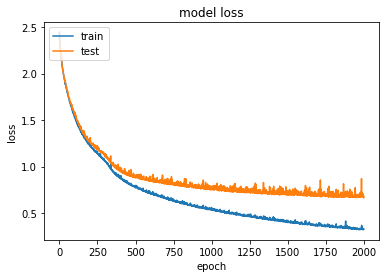

In [11]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()